In [154]:
import tensorflow
import h5py
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [155]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import Model, Sequential
from keras.layers import Input, concatenate, Conv2D, MaxPooling2D, UpSampling2D, Dropout, Cropping2D,Convolution2D
from keras.layers import BatchNormalization, Reshape
from keras.layers import Activation, Flatten, Dense
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.metrics import categorical_accuracy
from keras import backend as K
from keras import losses

In [156]:
hf = h5py.File('/home/joseph/Documents/data/Segmentation/HDF5/dataset_augmented_50.hdf5', 'r')

In [157]:
list(hf.keys())

['test_img', 'test_label', 'train_img', 'train_label', 'val_img', 'val_label']

In [272]:
train = hf['train_img'][:]
train = np.stack([train,train,train],axis=-1)

In [273]:
train.shape

(383, 200, 200, 1, 3)

In [231]:
#label = np.argmax(hf['train_label'],axis=3)
label = hf['train_label'][:]

In [274]:
train = train.reshape(383,200,200,3)

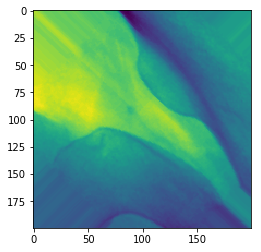

In [275]:
plt.imshow(train[0,...,0])

In [276]:
label = label.reshape((383,200,200,3))

In [236]:
label.shape

(383, 200, 200, 3)

In [237]:
type(label)

numpy.ndarray

In [299]:
input_shape=(200, 200, 3)
classes=3

    # c.f. https://github.com/alexgkendall/SegNet-Tutorial/blob/master/Example_Models/bayesian_segnet_camvid.prototxt
img_input = Input(shape=input_shape)
x = img_input
# Encoder
x = Conv2D(64, (3, 3), padding="same")(x)
print(x.shape)
#x = BatchNormalization()(x)
x = Activation("relu")(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
print(x.shape)

x = Conv2D(128, (3, 3), padding="same")(x)
print(x.shape)
#x = BatchNormalization()(x)
x = Activation("relu")(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
print(x.shape)

x = Conv2D(256, (3, 3), padding="same")(x)
print(x.shape)
#x = BatchNormalization()(x)
x = Activation("relu")(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
print(x.shape)

x = Conv2D(512, (3, 3), padding="same")(x)
print(x.shape)
#x = BatchNormalization()(x)
x = Activation("relu")(x)

# Decoder
x = Conv2D(512, (3, 3), padding="same")(x)
print(x.shape)
#x = BatchNormalization()(x)
x = Activation("relu")(x)

x = UpSampling2D(size=(2, 2))(x)
print(x.shape)
x = Conv2D(256, (3, 3), padding="same")(x)
print(x.shape)
#x = BatchNormalization()(x)
x = Activation("relu")(x)

x = UpSampling2D(size=(2, 2))(x)
print(x.shape)
x = Conv2D(128, (3, 3), padding="same")(x)
print(x.shape)
#x = BatchNormalization()(x)
x = Activation("relu")(x)

x = UpSampling2D(size=(2, 2))(x)
print(x.shape)
x = Conv2D(128, (3, 3), padding="same")(x)
print(x.shape)
#x = BatchNormalization()(x)
x = Activation("relu")(x)

x = Convolution2D(classes, (1,1), padding="valid")(x)
print(x.shape)


#x = Dense(classes,activation='softmax')(x)
x = Flatten()(x)
x = Reshape((input_shape[0]*input_shape[1],classes))(x)
print(x.shape)
x = Activation("softmax")(x)

model = Model(img_input, x)


(?, 200, 200, 64)
(?, 100, 100, 64)
(?, 100, 100, 128)
(?, 50, 50, 128)
(?, 50, 50, 256)
(?, 25, 25, 256)
(?, 25, 25, 512)
(?, 25, 25, 512)
(?, 50, 50, 512)
(?, 50, 50, 256)
(?, 100, 100, 256)
(?, 100, 100, 128)
(?, 200, 200, 128)
(?, 200, 200, 128)
(?, 200, 200, 3)
(?, 200, 200, 3)


In [301]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adadelta', metrics=["accuracy"])

In [ ]:
model.train_on_batch(train,label)